# The Friedmann Lemaitre Robertson Walker  cosmology II
## Chapters 3, 4

We will use the <code>LambdaCDM</code> package from <code>astropy.cosmology</code>

In [79]:
import numpy as np
from astropy.cosmology import LambdaCDM

from astropy import constants as cst
from astropy import units as u
import matplotlib.pyplot as plt

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [80]:
cosmo0 = LambdaCDM(H0=70,Om0=0,Ode0=0)
cosmo1 = LambdaCDM(H0=70,Om0=0.3,Ode0=0)
cosmo2 = LambdaCDM(H0=70,Om0=1,Ode0=0)
cosmo3 = LambdaCDM(H0=70,Om0=0,Ode0=1)

### Calculating the age of the Universe manually

In [81]:
def age_universe(a, Or, Om, Ol):
    """
    function that we integrate to obtain the age of the universe
    in units of H0!
    
    input:
    - The scale factor a
    - The density parameters Or, Om and Ol
    """
    O0 = Or + Om + Ol
    E = np.sqrt(Or/a**4 + Om/a**3 + (1 - O0)/a**2 + Ol)
    
    return 1 / (a * E)

In [82]:
import scipy.integrate as sc

In [5]:
z_list = np.logspace(-2,1.2,100)
(Or, Om, Ol) = (0.0, 0.3, 0.7)
cosmo4 = LambdaCDM(H0=70,Om0=0.3,Ode0=0.7)

Text(0, 0.5, 'Age of the Universe [Gyr]')

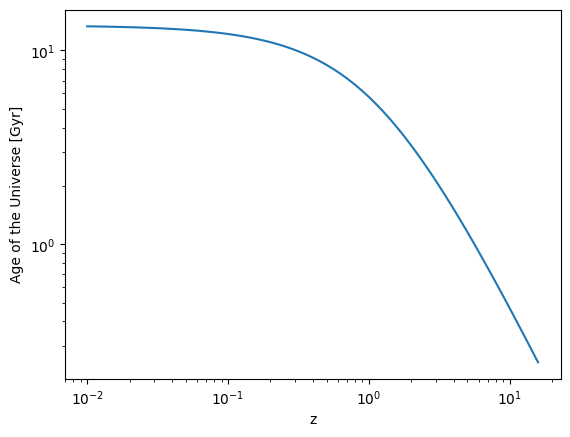

In [7]:
plt.plot(z_list,cosmo4.age(z_list))
plt.xlabel('z')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Age of the Universe ['+str(cosmo4.age(z_list).unit)+']')

In [84]:
# Age at z=0 from astropy
cosmo4.H0,cosmo4.H0.cgs
cosmo4.age(0).cgs

<Quantity 4.24985693e+17 s>

In [83]:
# Age at z=0 from own calculation
age_H0 = sc.quad(age_universe, 0,1, args=(Or, Om, Ol))
age_H0[0]/(cosmo4.H0.cgs)

<Quantity 4.24985693e+17 s>

In [30]:
age_at_z = []
for z in z_list:
    a_at_z = 1/(1+z)
    age_at_z.append(sc.quad(age_universe, 0,a_at_z, args=(Or, Om, Ol))[0])

age_at_z = age_at_z/(cosmo4.H0)

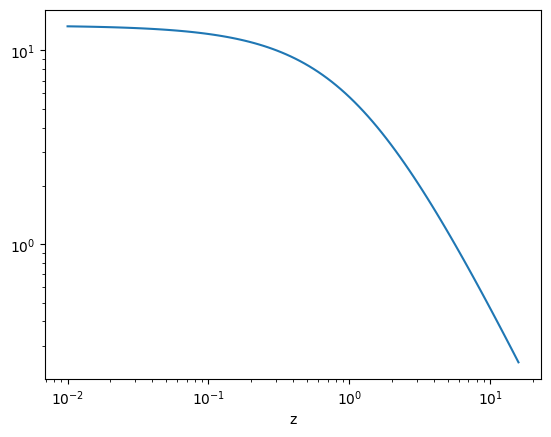

In [36]:
plt.plot(z_list,age_at_z.to(u.Gyr))
plt.xlabel('z')
plt.xscale('log')
plt.yscale('log')
#plt.ylabel('Age of the Universe ['+str(cosmo4.age(z_list).unit)+']')

### Proper and comoving distance

In [43]:
cosmo0.H0

<Quantity 70. km / (Mpc s)>

In [54]:
factor = cst.c.cgs/cosmo3.H0.cgs
factor

<Quantity 1.32151838e+28 cm>

Text(0, 0.5, 'Distance [Mpc]')

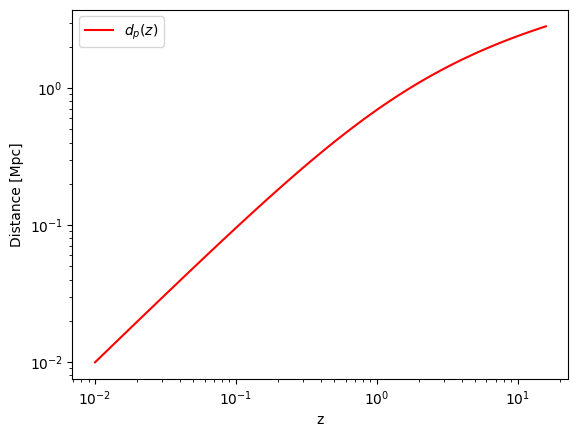

In [78]:
#plt.plot(z_list,np.log(1+z_list),linestyle='dashed',linewidth=3,label='$d_p(z)$',color='blue')
plt.plot(z_list,cosmo0.comoving_distance(z_list).cgs/factor,label='$d_p(z)$',color='red')
plt.legend()
plt.xlabel('z')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Distance ['+str(cosmo1.luminosity_distance(z_list).unit)+']')

### Angular diameter distance $D_A(z)$, luminosity distance $D_L(z)$ and comoving distance $d_P(z)$

Text(0, 0.5, 'Distance [Mpc]')

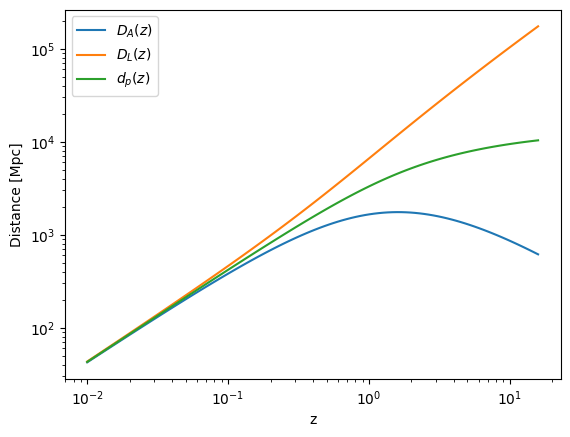

In [39]:
plt.plot(z_list,cosmo4.angular_diameter_distance(z_list),label='$D_A(z)$')
plt.plot(z_list,cosmo4.luminosity_distance(z_list),label='$D_L(z)$')
plt.plot(z_list,cosmo4.comoving_distance(z_list),label='$d_p(z)$')
plt.legend()
plt.xlabel('z')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Distance ['+str(cosmo1.luminosity_distance(z_list).unit)+']')